In [ ]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [ ]:
import torchvision.datasets
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=True)

X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test= MNIST_test.test_data
y_test = MNIST_test.test_labels

100%|██████████| 9912422/9912422 [00:00<00:00, 82910980.64it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 39729647.04it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 20575967.74it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 3451808.08it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [ ]:
X_train.dtype, y_train.dtype

(torch.uint8, torch.int64)

In [ ]:
X_train = X_train.float()
X_test = X_test.float()

In [ ]:
X_train.shape, X_test.shape
y_train.shape, y_test.shape

(torch.Size([60000]), torch.Size([60000]))

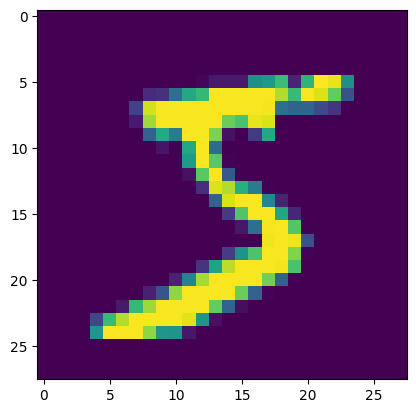

tensor(5)


In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

In [ ]:
X_train = X_train.reshape([-1, 28 * 28])
X_test = X_test.reshape([-1, 28 * 28])

In [ ]:
class MNISTNet(torch.nn.Module):
  def __init__(self, n_hidden_neurons):
    super(MNISTNet, self).__init__()
    self.fc1 = torch.nn.Linear(28 * 28, n_hidden_neurons)
    self.ac1 = torch.nn.Sigmoid()
    self.fc2 = torch.nn.Linear(n_hidden_neurons, 10)
  def forward(self, x):
    x = self.fc1(x)
    x = self.ac1(x)
    x = self.fc2(x)
    return x
mnist_net = MNISTNet(60)

In [ ]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-6)

In [ ]:
batch_size = 60
test_accuracy_history = []
test_loss_history = []


for epoch in range(3500):
  order = np.random.permutation(len(X_train))

  for start_index in range(0, len(X_train), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    X_batch = X_train[batch_indexes].to(device)
    y_batch = y_train[batch_indexes]

    preds = mnist_net.forward(X_batch)

    loss_value = loss(preds, y_batch)
    loss_value.backward()

    optimizer.step()

  test_preds = mnist_net.forward(X_test)
  test_loss_history.append(loss(test_preds, y_test))

  accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
  test_accuracy_history.append(accuracy)

  print(accuracy)

tensor(0.1512)
tensor(0.2007)
tensor(0.2503)
tensor(0.2967)
tensor(0.3415)
tensor(0.3838)
tensor(0.4252)
tensor(0.4638)
tensor(0.4980)
tensor(0.5275)
tensor(0.5544)
tensor(0.5785)
tensor(0.5994)
tensor(0.6178)
tensor(0.6335)
tensor(0.6486)
tensor(0.6621)
tensor(0.6737)
tensor(0.6853)
tensor(0.6962)
tensor(0.7060)
tensor(0.7149)
tensor(0.7234)
tensor(0.7308)
tensor(0.7380)
tensor(0.7455)
tensor(0.7518)
tensor(0.7580)
tensor(0.7620)
tensor(0.7669)
tensor(0.7715)
tensor(0.7764)
tensor(0.7807)
tensor(0.7853)
tensor(0.7896)
tensor(0.7929)
tensor(0.7969)
tensor(0.8007)
tensor(0.8038)
tensor(0.8071)
tensor(0.8094)
tensor(0.8120)
tensor(0.8146)
tensor(0.8174)
tensor(0.8198)
tensor(0.8223)
tensor(0.8241)
tensor(0.8261)
tensor(0.8282)
tensor(0.8299)
tensor(0.8313)
tensor(0.8328)
tensor(0.8347)
tensor(0.8366)
tensor(0.8376)
tensor(0.8392)
tensor(0.8409)
tensor(0.8423)
tensor(0.8432)
tensor(0.8445)
tensor(0.8454)
tensor(0.8467)
tensor(0.8479)
tensor(0.8490)
tensor(0.8503)
tensor(0.8518)
tensor(0.8

KeyboardInterrupt: ignored

In [ ]:
torch.cuda.is_available()
!nvidia-smi
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
mnist_net = mnist_net.to(device)
list(mnist_net.parametres())

In [ ]:
plt.plot(test_accuracy_history)

NameError: ignored

In [ ]:
plt.plot(test_loss_history)

NameError: ignored